In [1]:
## IMPORT LIBRARIES

In [1]:
%pip install matplotlib pandas seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
##Data Preprocessing
##Training Image preprocessing

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [5]:
##Validation Image Preprocessing

In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [7]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [8]:
for x,y in training_set:
    print(x)
    print(y)
    break

tf.Tensor(
[[[[196.75 190.75 200.75]
   [196.5  190.5  200.5 ]
   [186.5  180.5  190.5 ]
   ...
   [182.25 174.25 185.25]
   [175.   167.   178.  ]
   [176.25 168.25 179.25]]

  [[179.5  173.5  183.5 ]
   [205.25 199.25 209.25]
   [171.   165.   175.  ]
   ...
   [170.75 162.75 173.75]
   [183.75 175.75 186.75]
   [190.25 182.25 193.25]]

  [[187.5  181.5  191.5 ]
   [190.75 184.75 194.75]
   [190.75 184.75 194.75]
   ...
   [185.5  177.5  188.5 ]
   [191.5  183.5  194.5 ]
   [179.75 171.75 182.75]]

  ...

  [[216.75 210.75 222.75]
   [216.   210.   222.  ]
   [216.5  210.5  222.5 ]
   ...
   [196.5  190.5  200.5 ]
   [198.   192.   202.  ]
   [201.   195.   205.  ]]

  [[214.   208.   220.  ]
   [214.5  208.5  220.5 ]
   [214.25 208.25 220.25]
   ...
   [201.   195.   205.  ]
   [202.75 196.75 206.75]
   [198.5  192.5  202.5 ]]

  [[213.25 207.25 219.25]
   [214.75 208.75 220.75]
   [213.75 207.75 219.75]
   ...
   [199.   193.   203.  ]
   [199.   193.   203.  ]
   [199.75 193.75 20

In [9]:
##Building Model

In [10]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from keras.layers import Dropout

In [11]:
model=Sequential()

In [12]:
##Building Convolution Layer

In [13]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\esrut\Desktop\plant_disease_project\tfvenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [17]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [18]:
model.add(Dropout(0.25))

In [19]:
model.add(Flatten())

In [20]:
model.add(Dense(units=1024,activation='relu')) 
#model.add(Dense(25, activation='softmax'))

In [21]:
#model.add(Dropout(0.5))

In [22]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

In [23]:
##Compiling and Training Phase

In [24]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
model.summary() 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 62, 62, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 31, 31, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 29, 29, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          38,950 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,849,350 (26.13 MB)

 Trainable params: 6,849,350 (26.13 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
##Model training

In [27]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3789s 2s/step - accuracy: 0.4616 - loss: 1.9027 - val_accuracy: 0.8461 - val_loss: 0.4836
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2347s 1s/step - accuracy: 0.8559 - loss: 0.4547 - val_accuracy: 0.9218 - val_loss: 0.2482
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2441s 1s/step - accuracy: 0.9155 - loss: 0.2636 - val_accuracy: 0.8607 - val_loss: 0.4374
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 11403s 5s/step - accuracy: 0.9375 - loss: 0.1890 - val_accuracy: 0.9194 - val_loss: 0.2498
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 13899s 6s/step - accuracy: 0.9577 - loss: 0.1286 - val_accuracy: 0.9428 - val_loss: 0.1884
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2577s 1s/step - accuracy: 0.9655 - loss: 0.1025 - val_accuracy: 0.9448 - val_loss: 0.1729
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2540s 1s/step - accuracy: 0.9738 - loss: 0.0780 - val_accuracy: 0.9541 - val_loss: 0.1590
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2615s 1s/step - accuracy: 0.9768

In [28]:
##Model Evaluation

In [29]:
train_loss,train_acc=model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 680s 310ms/step - accuracy: 0.9816 - loss: 0.0542


In [39]:
print(train_loss,train_acc)

0.04998363181948662 0.9835976958274841


In [30]:
val_loss,val_acc=model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 173s 314ms/step - accuracy: 0.9524 - loss: 0.1497


In [31]:
print(val_loss,val_acc)

0.16124571859836578 0.9508877992630005


In [32]:
#Saving model

In [33]:
model.save("trained_model.keras") 

In [34]:
training_history.history

{'accuracy': [0.6490219831466675,
  0.8734334111213684,
  0.9222135543823242,
  0.9444199204444885,
  0.9586172699928284,
  0.9669820070266724,
  0.9732413291931152,
  0.9770964980125427,
  0.9798705577850342,
  0.9820897579193115],
 'loss': [1.1802507638931274,
  0.3948085308074951,
  0.2407088279724121,
  0.16815128922462463,
  0.1241605281829834,
  0.09877059608697891,
  0.07866809517145157,
  0.07083503156900406,
  0.059798676520586014,
  0.05536218732595444],
 'val_accuracy': [0.8460619449615479,
  0.9217504858970642,
  0.8606874346733093,
  0.9194172620773315,
  0.9428067207336426,
  0.9447985291481018,
  0.954131543636322,
  0.9444001913070679,
  0.9623833298683167,
  0.9508877992630005],
 'val_loss': [0.48358216881752014,
  0.24817784130573273,
  0.4373539686203003,
  0.249846413731575,
  0.1883671134710312,
  0.1728614866733551,
  0.15900857746601105,
  0.1955784261226654,
  0.12841449677944183,
  0.1612456738948822]}

In [43]:
#Record history
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)


In [36]:
##accuracy visualisation

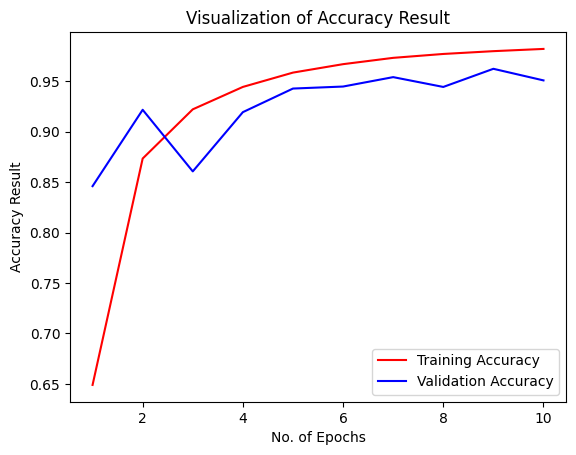

In [38]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [ ]:
##Someother metrics for model evaluation

In [40]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [41]:
test_set= tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [42]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 176s 320ms/step


(array([[9.99994874e-01, 2.65692006e-06, 1.00652384e-08, ...,
         3.44608578e-14, 4.89666684e-12, 5.00471053e-10],
        [9.98887956e-01, 3.89695424e-06, 1.25288349e-08, ...,
         2.84114616e-12, 1.24908959e-12, 1.35172185e-08],
        [9.99687195e-01, 6.20221035e-05, 2.43041764e-08, ...,
         1.82410612e-14, 4.12314199e-13, 9.31636102e-10],
        ...,
        [3.89817245e-09, 3.73269818e-12, 2.91556461e-07, ...,
         2.00615924e-09, 6.06914519e-11, 9.99991059e-01],
        [1.64874479e-08, 1.52532522e-12, 1.13215375e-08, ...,
         6.99795333e-10, 1.39612375e-11, 9.99999285e-01],
        [1.13177241e-12, 2.84662939e-14, 6.35836219e-13, ...,
         2.60889400e-13, 1.09437312e-11, 9.99992490e-01]], dtype=float32),
 (17572, 38))

In [45]:
predicted_categories=tf.argmax(y_pred,axis=1)

In [47]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [50]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [51]:
Y_true =tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [57]:
%pip install scikit-learn

  Using cached scikit_learn-1.5.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.13.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.0-cp312-cp312-win_amd64.whl (10.9 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.13.1-cp312-cp312-win_amd64.whl (45.9 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [58]:
##Precision recall
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.93      0.95       504
                                 Apple___Black_rot       0.96      0.98      0.97       497
                          Apple___Cedar_apple_rust       0.98      0.92      0.95       440
                                   Apple___healthy       0.97      0.89      0.93       502
                               Blueberry___healthy       0.97      0.88      0.92       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.96      0.97       421
                 Cherry_(including_sour)___healthy       0.95      0.98      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.92      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.97      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.95      0.

In [61]:
cm=confusion_matrix(Y_true,predicted_categories)
cm.shape

(38, 38)

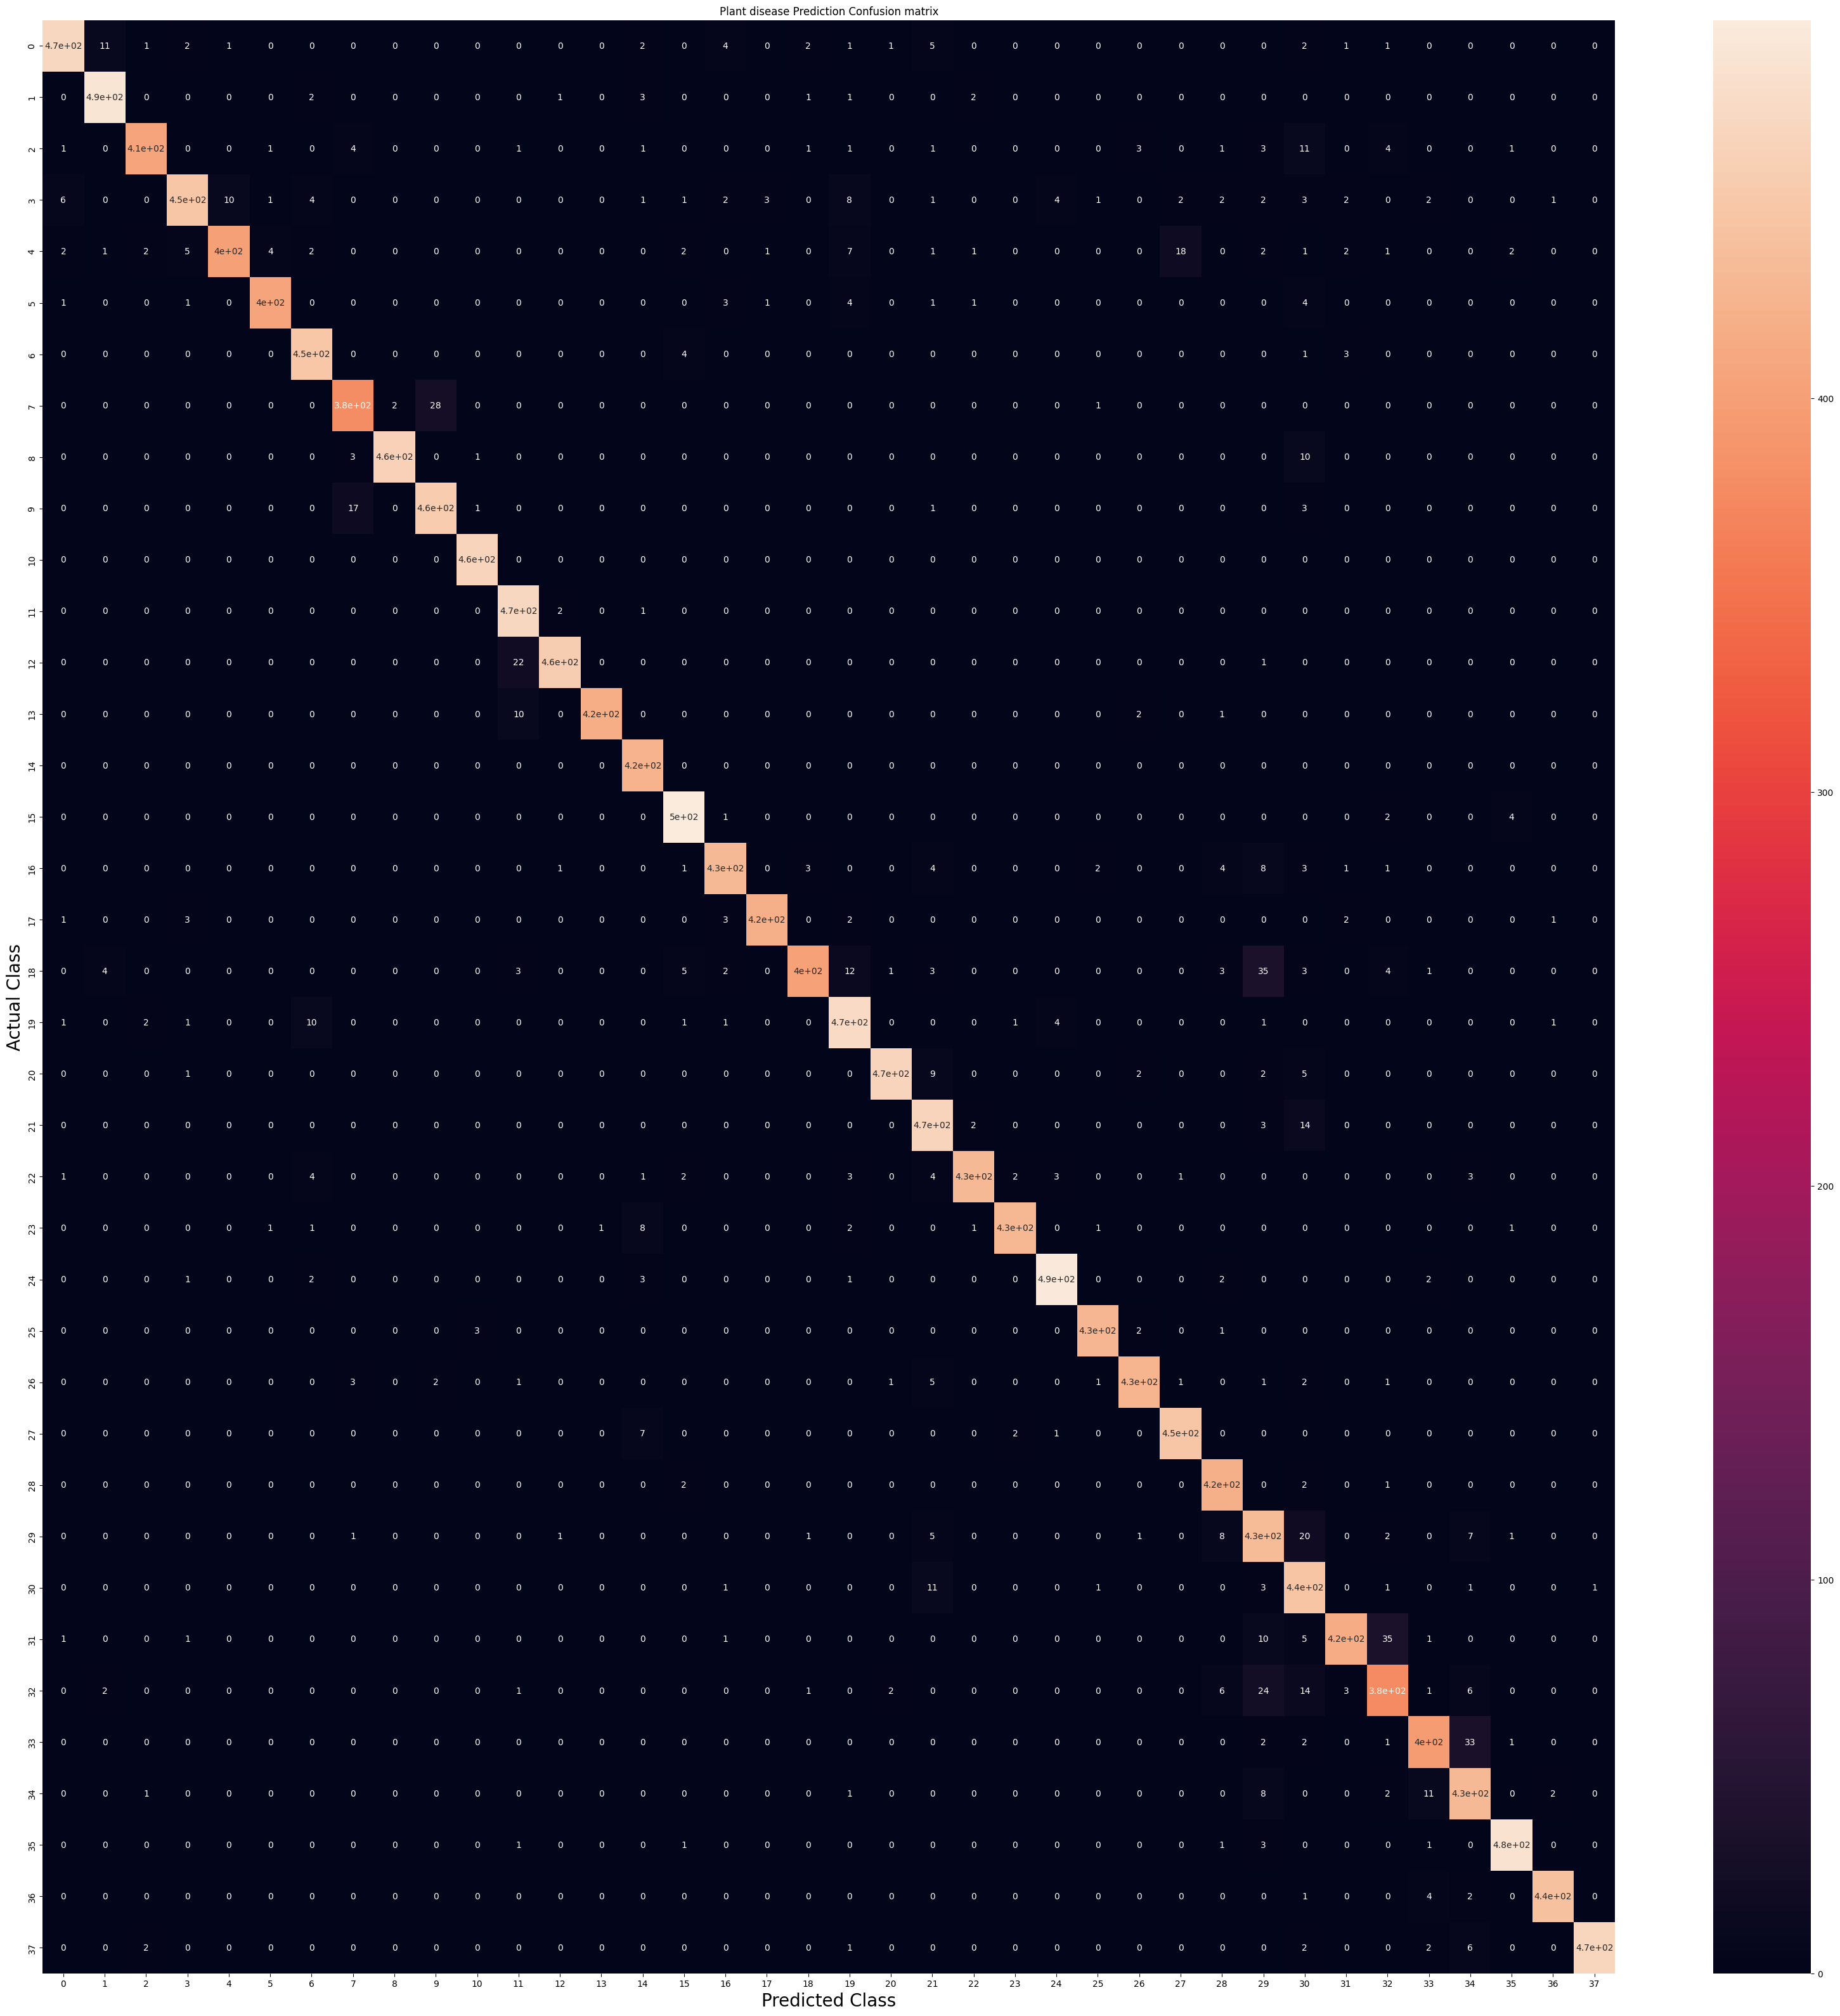

In [63]:
##Confusion matrix visualisation
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant disease Prediction Confusion matrix")
plt.show()